In [2]:
'''

Here we explore the WWTP data set with the goal to generate some synthetic data such that we get from 1 day to 10 min intervals.

Note here that we do this in a rather simple manner
- the main goal of this is to get data that mimics real world data "well enough" for the purpose of testing data pipelines etc.
 
Our methods do not account for the complex relationships between the features at all.
We basically just add some noise so that plotting the signal would somewhat look like real data.
Thus we wont be doing any cool modeling on this data.

'''

# 1. Imports and reading the data

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

data_path = os.environ['DATA_PATH']
df_original = pd.read_csv(data_path)

df_original.head()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,79.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,0.0,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,77.8,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,53.5,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,53.5,2014,1,7


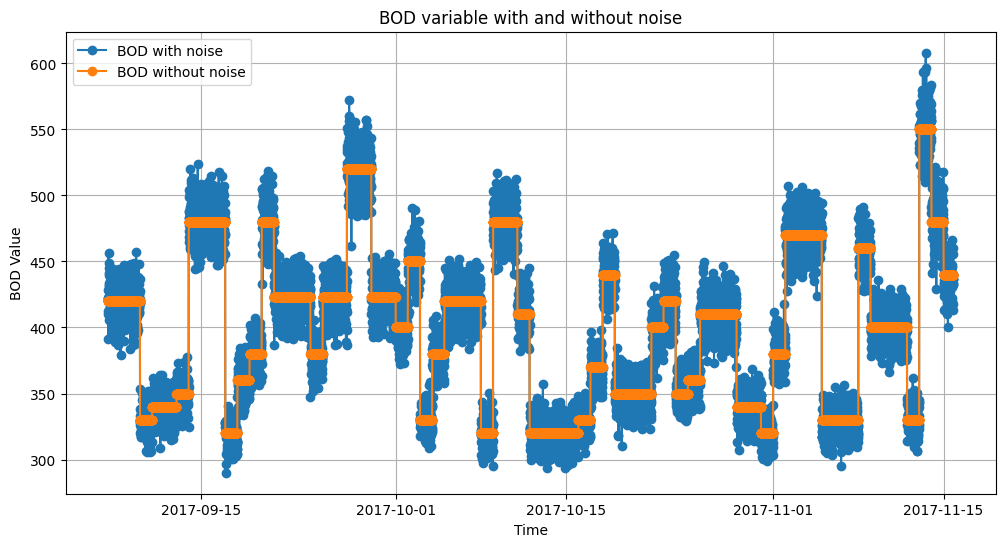

In [3]:
# 2. Basic data processing and generating the fake data

df_original['date'] = pd.to_datetime(df_original[['year', 'month', 'day']])
df_original.set_index('date', inplace=True)

# Drop the original year, month and day columns
df_original.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Resample the original dataset to 10-minute intervals
df_resampled = df_original.resample('10T').asfreq()

df_resampled = df_resampled.ffill()

# Add random noise to the resampled dataset
np.random.seed(0) 
noise = np.random.normal(0, 0.03, df_resampled.shape)
df_noisy = df_resampled + df_resampled * noise
df_noisy.index = df_resampled.index

# Set a time window for plots
start_point = random.choice(range(len(df_noisy) - 10000))
df_subsample = df_noisy.iloc[start_point : start_point + 10000]
df_resampled_subsample = df_resampled.iloc[start_point : start_point + 10000]

# Plotting one feature to check it looks right
plt.figure(figsize=(12, 6))
plt.plot(df_subsample.index, df_subsample['BOD'], marker='o', label='BOD with noise')
plt.plot(df_resampled_subsample.index, df_resampled_subsample['BOD'], marker='o', label='BOD without noise')
plt.title('BOD variable with and without noise')
plt.xlabel('Time')
plt.ylabel('BOD Value')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# 3. Extract the last month and set a fake date

df_last_month = df_noisy[df_noisy.index.month == df_noisy.index[-1].month]

# Change the date column to start from 10th of June, 2023, at 22:00
df_last_month.index = pd.date_range(start='2023-06-10 22:00:00', periods=len(df_last_month), freq='10T')

df_last_month.head()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG
2023-06-10 22:00:00,3.163857,3.596004,243659.044573,30.729372,357.703182,727.009857,65.061676,12.091753,14.375862,8.499512,0.0,91.835803,5.634091,82.699126,6.076893,16.123286,0.0
2023-06-10 22:10:00,3.106359,3.317449,251281.507398,32.090960,357.987203,737.081814,57.789984,11.671363,15.194790,9.011867,0.0,89.391246,5.115803,76.067924,5.907564,16.703726,0.0
2023-06-10 22:20:00,2.965896,3.299592,246003.921193,31.953789,351.628213,706.057016,61.950130,12.454020,14.460812,8.922476,0.0,95.678442,5.338118,85.371902,5.693246,16.195687,0.0
2023-06-10 22:30:00,2.966681,3.362028,269126.840884,30.711664,344.308467,713.030899,60.247139,11.845738,13.862745,8.791037,0.0,94.695729,5.311336,81.280857,5.902075,15.750272,0.0
2023-06-10 22:40:00,3.045402,3.401665,243817.301279,31.073134,350.305935,706.358111,59.748361,12.152657,14.513973,8.638281,0.0,94.502478,5.217546,86.693041,6.062578,16.499300,0.0
